## Past Delay Impact Investigation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [141]:
df = pd.read_csv("flights_nullsremoved.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [142]:
df = df[df.arr_delay < 225]
df = df[df.arr_delay > -225]

---
**looking first at mean**

In [81]:
test_date = df[['fl_date','dep_delay','arr_delay']].copy()

In [5]:
def get_month(date):
    """Returns the month the flight occurs
    INPUT date in form YYYY-MM-DD
    RETURNS month"""
    DATE = datetime.datetime.strptime(date, "%Y-%m-%d")
    return DATE.month

In [6]:
def get_day_of_week(date):
    """Returns the day of the week
    INPUT date in the form YYYY-MM-DD
    RETURNS number of day of the week:
            where 0 = Monday and 6 = Sunday"""
    DATE = datetime.datetime.strptime(date, "%Y-%m-%d")
    return DATE.weekday()

In [82]:
test_date.loc[:,'fl_month'] = test_date['fl_date'].apply(get_month)
test_date.loc[:,'fl_dow'] = test_date['fl_date'].apply(get_day_of_week)

In [83]:
month = test_date.groupby("fl_month", as_index=False)[["dep_delay","arr_delay"]].mean()

In [84]:
day = test_date.groupby("fl_dow", as_index=False)[["dep_delay","arr_delay"]].mean()

In [85]:
month.describe()

,fl_month,dep_delay,arr_delay
count,12.000000,12.000000,12.000000
mean,6.500000,7.656561,2.638857
std,3.605551,1.964061,2.293241
min,1.000000,4.851085,-0.360502
25%,3.750000,6.108177,0.876261
50%,6.500000,7.490467,1.995932
75%,9.250000,8.778947,4.071852
max,12.000000,10.999953,6.841164


In [86]:
day.describe()

,fl_dow,dep_delay,arr_delay
count,7.000000,7.000000,7.000000
mean,3.000000,7.643635,2.610706
std,2.160247,1.048093,1.472581
min,0.000000,6.115176,0.058519
25%,1.500000,6.903911,2.047412
50%,3.000000,7.626411,2.273165
75%,4.500000,8.577742,3.791260
max,6.000000,8.800555,4.265915


In [87]:
month = pd.melt(month, id_vars="fl_month", var_name="type_delay", value_name="delay_length")

In [88]:
day = pd.melt(day, id_vars="fl_dow", var_name="type_delay", value_name="delay_length")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


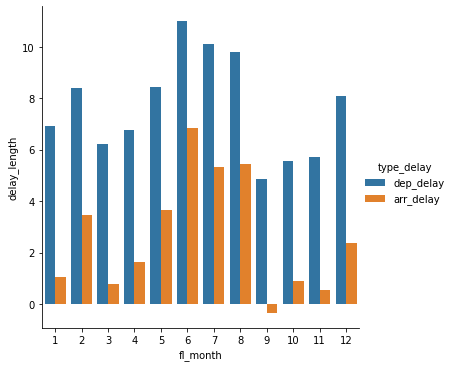

In [89]:
sns.factorplot(x='fl_month', y='delay_length', hue='type_delay', data=month, kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


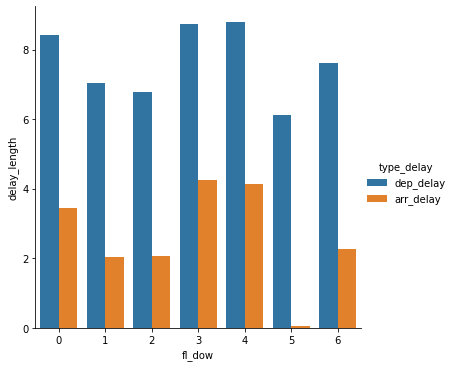

In [90]:
sns.factorplot(x='fl_dow', y='delay_length', hue='type_delay', data=day, kind='bar')

In [91]:
monthandday = test_date.groupby(["fl_month",'fl_dow'], as_index=False)[["dep_delay","arr_delay"]].mean()

In [92]:
monthandday = pd.melt(monthandday, id_vars=["fl_month",'fl_dow'], var_name="type_delay", value_name="delay_length")

In [93]:
monthandday[monthandday['fl_month']==1].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,1.0,3.000000,3.852528
std,0.0,2.075498,3.409215
min,1.0,0.000000,-2.693307
25%,1.0,1.250000,1.494035
50%,1.0,3.000000,3.833217
75%,1.0,4.750000,6.816635
max,1.0,6.000000,8.459565


In [94]:
monthandday[monthandday['fl_month']==2].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,2.0,3.000000,5.847861
std,0.0,2.075498,3.018666
min,2.0,0.000000,-0.106330
25%,2.0,1.250000,3.974127
50%,2.0,3.000000,5.385474
75%,2.0,4.750000,8.927746
max,2.0,6.000000,9.746122


In [95]:
monthandday[monthandday['fl_month']==6].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,6.0,3.000000,8.914482
std,0.0,2.075498,2.487922
min,6.0,0.000000,4.970018
25%,6.0,1.250000,6.778757
50%,6.0,3.000000,9.179077
75%,6.0,4.750000,10.669397
max,6.0,6.000000,12.557613


In [143]:
test_dep_time = df[['crs_dep_time','crs_arr_time','dep_delay','arr_delay']].copy()

In [12]:
def check_time_block(time):
    """Determine the hour of the day
    INPUT time HHMM
    RETURNS hour 0-23 where 0 == 12am and 23 == 11pm"""
    if type(time) == 'numpy.ndarray':
        time = time.astype(int)
    time = int(time)
    
    t = time // 100
    if t == 0:
        return 0
    return t-1

In [144]:
test_dep_time.loc[:,'dep_hour'] = test_dep_time['crs_dep_time'].apply(check_time_block)
test_dep_time.loc[:,'arr_hour'] = test_dep_time['crs_arr_time'].apply(check_time_block)

In [98]:
dep_time = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].mean()
arr_time = test_dep_time.groupby("arr_hour",as_index=False)[["arr_delay","dep_delay"]].mean()

In [99]:
dep_time.describe()

,dep_hour,arr_delay,dep_delay
count,23.00000,23.000000,23.000000
mean,11.00000,2.598726,7.991566
std,6.78233,4.284657,4.246996
min,0.00000,-5.458516,-0.377988
25%,5.50000,-0.575581,5.659748
50%,11.00000,3.131114,8.138388
75%,16.50000,6.081577,10.958054
max,22.00000,8.846837,13.729324


In [100]:
arr_time.describe()

,arr_hour,arr_delay,dep_delay
count,24.000000,24.000000,24.000000
mean,11.500000,3.128307,8.756523
std,7.071068,5.519634,5.825810
min,0.000000,-4.363672,0.240966
25%,5.750000,-1.435632,4.459741
50%,11.500000,2.725765,9.272686
75%,17.250000,6.967087,12.798451
max,23.000000,18.931034,25.275862


In [101]:
dep_time = pd.melt(dep_time, id_vars="dep_hour", var_name="type_delay", value_name="delay_length")
arr_time = pd.melt(arr_time, id_vars="arr_hour", var_name="type_delay", value_name="delay_length")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


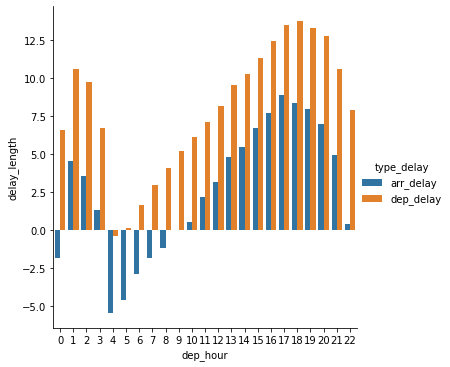

In [102]:
sns.factorplot(x='dep_hour', y='delay_length', hue='type_delay', data=dep_time, kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


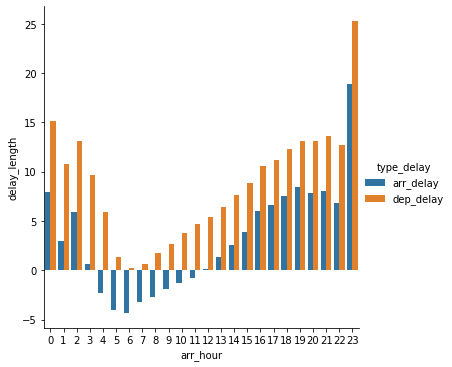

In [103]:
sns.factorplot(x='arr_hour', y='delay_length', hue='type_delay', data=arr_time, kind='bar')

---
***Repeat for Median***

In [104]:
test_date = df[['fl_date','dep_delay','arr_delay']].copy()

In [105]:
test_date.loc[:,'fl_month'] = test_date['fl_date'].apply(get_month)
test_date.loc[:,'fl_dow'] = test_date['fl_date'].apply(get_day_of_week)

In [106]:
month = test_date.groupby("fl_month", as_index=False)[["dep_delay","arr_delay"]].median()

In [107]:
day = test_date.groupby("fl_dow", as_index=False)[["dep_delay","arr_delay"]].median()

In [108]:
month.describe()

,fl_month,dep_delay,arr_delay
count,12.000000,12.000000,12.000000
mean,6.500000,-2.333333,-5.916667
std,3.605551,0.651339,1.083625
min,1.000000,-3.000000,-8.000000
25%,3.750000,-3.000000,-6.250000
50%,6.500000,-2.000000,-6.000000
75%,9.250000,-2.000000,-5.000000
max,12.000000,-1.000000,-4.000000


In [109]:
day.describe()

,fl_dow,dep_delay,arr_delay
count,7.000000,7.000000,7.000000
mean,3.000000,-2.285714,-5.857143
std,2.160247,0.487950,0.690066
min,0.000000,-3.000000,-7.000000
25%,1.500000,-2.500000,-6.000000
50%,3.000000,-2.000000,-6.000000
75%,4.500000,-2.000000,-5.500000
max,6.000000,-2.000000,-5.000000


In [110]:
month = pd.melt(month, id_vars="fl_month", var_name="type_delay", value_name="delay_length")

In [111]:
day = pd.melt(day, id_vars="fl_dow", var_name="type_delay", value_name="delay_length")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


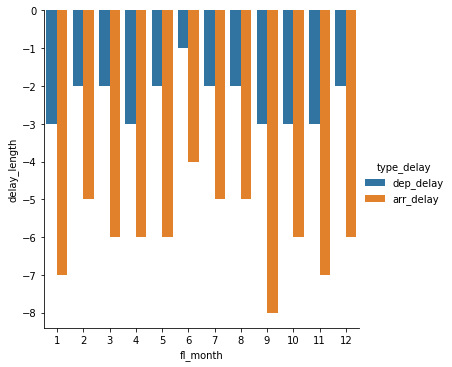

In [114]:
sns.factorplot(x='fl_month', y='delay_length', hue='type_delay', data=month, kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


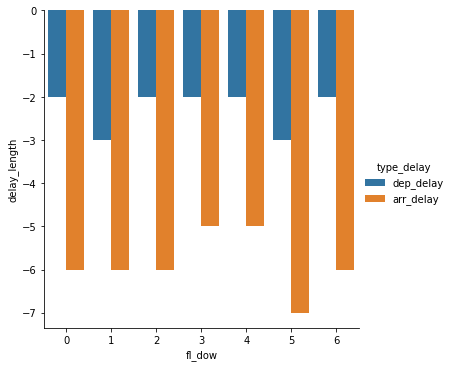

In [115]:
sns.factorplot(x='fl_dow', y='delay_length', hue='type_delay', data=day, kind='bar')

In [112]:
monthandday = test_date.groupby(["fl_month",'fl_dow'], as_index=False)[["dep_delay","arr_delay"]].median()

In [113]:
monthandday = pd.melt(monthandday, id_vars=["fl_month",'fl_dow'], var_name="type_delay", value_name="delay_length")

In [116]:
monthandday[monthandday['fl_month']==1].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,1.0,3.000000,-4.785714
std,0.0,2.075498,2.423557
min,1.0,0.000000,-9.000000
25%,1.0,1.250000,-7.000000
50%,1.0,3.000000,-4.500000
75%,1.0,4.750000,-3.000000
max,1.0,6.000000,-2.000000


In [117]:
monthandday[monthandday['fl_month']==2].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,2.0,3.000000,-3.714286
std,0.0,2.075498,1.938619
min,2.0,0.000000,-8.000000
25%,2.0,1.250000,-5.000000
50%,2.0,3.000000,-3.500000
75%,2.0,4.750000,-2.000000
max,2.0,6.000000,-1.000000


In [118]:
monthandday[monthandday['fl_month']==6].describe()

,fl_month,fl_dow,delay_length
count,14.0,14.000000,14.000000
mean,6.0,3.000000,-2.714286
std,0.0,2.075498,1.489893
min,6.0,0.000000,-5.000000
25%,6.0,1.250000,-4.000000
50%,6.0,3.000000,-2.500000
75%,6.0,4.750000,-1.250000
max,6.0,6.000000,-1.000000


### Looking at dep_time

In [119]:
test_dep_time = df[['crs_dep_time','crs_arr_time','dep_delay','arr_delay']].copy()

In [120]:
test_dep_time.loc[:,'dep_hour'] = test_dep_time['crs_dep_time'].apply(check_time_block)
test_dep_time.loc[:,'arr_hour'] = test_dep_time['crs_arr_time'].apply(check_time_block)

In [121]:
dep_time = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].median()
arr_time = test_dep_time.groupby("arr_hour",as_index=False)[["arr_delay","dep_delay"]].median()

In [122]:
dep_time.describe()

,dep_hour,arr_delay,dep_delay
count,23.00000,23.000000,23.000000
mean,11.00000,-5.869565,-2.173913
std,6.78233,2.029428,1.192864
min,0.00000,-9.000000,-4.000000
25%,5.50000,-7.000000,-3.000000
50%,11.00000,-6.000000,-2.000000
75%,16.50000,-4.000000,-1.000000
max,22.00000,-3.000000,-1.000000


In [123]:
arr_time.describe()

,arr_hour,arr_delay,dep_delay
count,24.000000,24.000000,24.000000
mean,11.500000,-5.583333,-1.750000
std,7.071068,2.636148,1.674619
min,0.000000,-9.000000,-4.000000
25%,5.750000,-8.000000,-3.000000
50%,11.500000,-6.000000,-2.000000
75%,17.250000,-4.000000,-1.000000
max,23.000000,2.000000,4.000000


In [124]:
dep_time = pd.melt(dep_time, id_vars="dep_hour", var_name="type_delay", value_name="delay_length")
arr_time = pd.melt(arr_time, id_vars="arr_hour", var_name="type_delay", value_name="delay_length")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


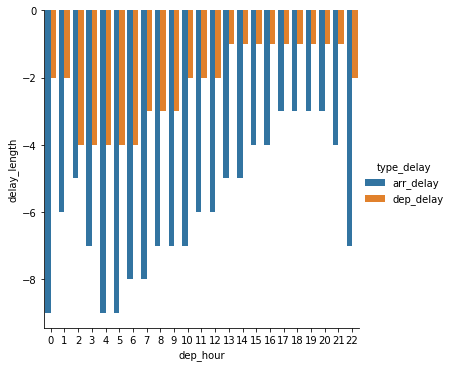

In [125]:
sns.factorplot(x='dep_hour', y='delay_length', hue='type_delay', data=dep_time, kind='bar')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


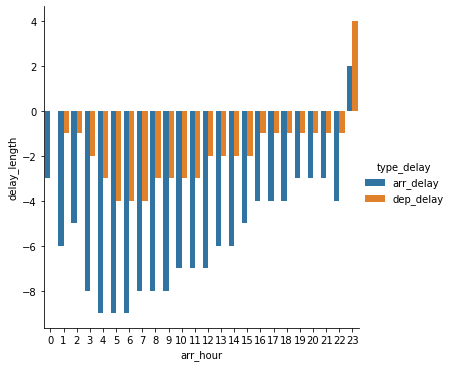

In [126]:
sns.factorplot(x='arr_hour', y='delay_length', hue='type_delay', data=arr_time, kind='bar')

---

### Determine the dictionary for median and mean 
-225 < arr_delay < 225

In [145]:
dep_time_med = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].median()

In [146]:
dep_time_mean = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].mean()

In [147]:
dep_time_med[["dep_hour","arr_delay"]].to_dict()

{'dep_hour': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22},
 'arr_delay': {0: -9.0,
  1: -6.0,
  2: -6.0,
  3: -7.0,
  4: -9.0,
  5: -9.0,
  6: -8.0,
  7: -8.0,
  8: -7.0,
  9: -7.0,
  10: -7.0,
  11: -6.0,
  12: -6.0,
  13: -5.0,
  14: -5.0,
  15: -4.0,
  16: -4.0,
  17: -3.0,
  18: -3.0,
  19: -3.0,
  20: -4.0,
  21: -4.0,
  22: -7.0}}

In [148]:
dep_time_med[["dep_hour","dep_delay"]].to_dict()

{'dep_hour': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22},
 'dep_delay': {0: -2.0,
  1: -2.0,
  2: -3.0,
  3: -4.0,
  4: -4.0,
  5: -4.0,
  6: -4.0,
  7: -3.0,
  8: -3.0,
  9: -3.0,
  10: -2.0,
  11: -2.0,
  12: -2.0,
  13: -1.0,
  14: -1.0,
  15: -1.0,
  16: -1.0,
  17: -1.0,
  18: -1.0,
  19: -1.0,
  20: -1.0,
  21: -1.0,
  22: -2.0}}

In [149]:
dep_time_mean[["dep_hour","arr_delay"]].to_dict()

{'dep_hour': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22},
 'arr_delay': {0: -1.6642602344148123,
  1: 3.440501043841336,
  2: 4.343870014771049,
  3: 1.3802367941712204,
  4: -5.484170909895949,
  5: -4.606989162142505,
  6: -2.907391092361358,
  7: -1.8630207558845115,
  8: -1.085556598557783,
  9: 0.08580366114366288,
  10: 0.5798795108102116,
  11: 2.115288435274042,
  12: 3.1173279785990315,
  13: 4.805705640109731,
  14: 5.449820220021156,
  15: 6.739257741261025,
  16: 7.6573414085094385,
  17: 8.877695016385436,
  18: 8.378205975005564,
  19: 7.965689735642226,
  20: 6.8922934459978995,
  21: 4.922862682118726,
  22: 0.5166495242993058}}

In [150]:
dep_time_mean[["dep_hour","dep_delay"]].to_dict()

{'dep_hour': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22},
 'dep_delay': {0: 6.711716493969764,
  1: 9.675249362096961,
  2: 10.619793205317578,
  3: 6.630692167577413,
  4: -0.4136475056746801,
  5: 0.11429594186434255,
  6: 1.6161646966248562,
  7: 2.9157571077032296,
  8: 4.135963064069914,
  9: 5.26489329589765,
  10: 6.13392546097791,
  11: 7.0181790875984875,
  12: 8.131680643107183,
  13: 9.510919588229374,
  14: 10.304524506138106,
  15: 11.336050018124949,
  16: 12.382205588783819,
  17: 13.536146413960237,
  18: 13.756275088751552,
  19: 13.289175306396258,
  20: 12.634817154337778,
  21: 10.544540416974117,
  22: 7.987786063255336}}

### Determine the dictionary for median and mean 
-33 < arr_delay < 33

In [23]:
df = pd.read_csv("flights_nullsremoved.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
df = df[df.arr_delay < 33]
df = df[df.arr_delay > -33]

In [25]:
test_dep_time = df[['crs_dep_time','crs_arr_time','dep_delay','arr_delay']].copy()

In [26]:
test_dep_time.loc[:,'dep_hour'] = test_dep_time['crs_dep_time'].apply(check_time_block)
test_dep_time.loc[:,'arr_hour'] = test_dep_time['crs_arr_time'].apply(check_time_block)

In [27]:
dep_time_med = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].median()
dep_time_mean = test_dep_time.groupby("dep_hour",as_index=False)[["arr_delay","dep_delay"]].mean()

In [28]:
import pprint

In [29]:
pprint.pprint(dep_time_med[["dep_hour","arr_delay"]].to_dict())

{'arr_delay': {0: -10.0,
               1: -9.0,
               2: -8.0,
               3: -9.0,
               4: -9.0,
               5: -9.0,
               6: -8.0,
               7: -8.0,
               8: -8.0,
               9: -8.0,
               10: -8.0,
               11: -8.0,
               12: -7.0,
               13: -7.0,
               14: -7.0,
               15: -6.0,
               16: -7.0,
               17: -6.0,
               18: -6.0,
               19: -6.0,
               20: -6.0,
               21: -6.0,
               22: -8.0},
 'dep_hour': {0: 0,
              1: 1,
              2: 2,
              3: 3,
              4: 4,
              5: 5,
              6: 6,
              7: 7,
              8: 8,
              9: 9,
              10: 10,
              11: 11,
              12: 12,
              13: 13,
              14: 14,
              15: 15,
              16: 16,
              17: 17,
              18: 18,
              19: 19,
             

In [30]:
pprint.pprint(dep_time_med[["dep_hour","dep_delay"]].to_dict())

{'dep_delay': {0: -3.0,
               1: -4.0,
               2: -4.0,
               3: -5.0,
               4: -4.0,
               5: -4.0,
               6: -4.0,
               7: -3.0,
               8: -3.0,
               9: -3.0,
               10: -3.0,
               11: -3.0,
               12: -2.0,
               13: -2.0,
               14: -2.0,
               15: -2.0,
               16: -2.0,
               17: -2.0,
               18: -2.0,
               19: -2.0,
               20: -2.0,
               21: -2.0,
               22: -2.0},
 'dep_hour': {0: 0,
              1: 1,
              2: 2,
              3: 3,
              4: 4,
              5: 5,
              6: 6,
              7: 7,
              8: 8,
              9: 9,
              10: 10,
              11: 11,
              12: 12,
              13: 13,
              14: 14,
              15: 15,
              16: 16,
              17: 17,
              18: 18,
              19: 19,
              

In [31]:
pprint.pprint(dep_time_mean[["dep_hour","arr_delay"]].to_dict())

{'arr_delay': {0: -7.58732101333986,
               1: -6.634174311926605,
               2: -6.2843208092485545,
               3: -6.975903614457831,
               4: -8.331398783568611,
               5: -7.858368525675082,
               6: -7.14693439278428,
               7: -6.834037548551893,
               8: -6.62487228680073,
               9: -6.306337434203807,
               10: -6.394978588044954,
               11: -5.817990758156593,
               12: -5.496870248628216,
               13: -5.158359200508952,
               14: -5.0861819033743565,
               15: -4.567271150390212,
               16: -4.942765354271966,
               17: -4.260733165390561,
               18: -4.642445263574764,
               19: -4.5903971202972595,
               20: -4.505401682941364,
               21: -4.586284882691892,
               22: -6.233487025520051},
 'dep_hour': {0: 0,
              1: 1,
              2: 2,
              3: 3,
              4: 4,
            

In [32]:
pprint.pprint(dep_time_mean[["dep_hour","dep_delay"]].to_dict())

{'dep_delay': {0: 0.42912740178680703,
               1: -0.5065940366972477,
               2: -0.3847543352601156,
               3: -1.749083289680461,
               4: -3.0829108831787004,
               5: -2.9193244937764877,
               6: -2.3623997177524503,
               7: -1.7267006192110192,
               8: -1.0432601329049862,
               9: -0.6549083644216878,
               10: -0.2520532168206103,
               11: -0.14365024367652865,
               12: 0.45856899711129384,
               13: 0.7079231065909523,
               14: 0.9622114518738698,
               15: 1.1735621618817433,
               16: 1.0110296174720703,
               17: 1.2984492330628283,
               18: 1.5484885014702277,
               19: 1.4126154719512825,
               20: 1.6790047748453925,
               21: 1.2421483215009144,
               22: 0.7904460647651727},
 'dep_hour': {0: 0,
              1: 1,
              2: 2,
              3: 3,
              4: 4,